<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/07_DecisionTree_iPhone_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [93]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('DS102.K21/iphone_purchase_records.csv')

In [0]:
X = data.iloc[:,0:-1]

In [0]:
y = data.iloc[:,-1]

# 2 . Preprocessing data

In [0]:
X['Gender'] = np.array(pd.get_dummies(X['Gender']))

# 3 . Split data

In [98]:
X_train = X[0:300]
X_train.shape

(300, 3)

In [99]:
y_train = y[0:300]
y_train.shape

(300,)

In [100]:
X_test = X[300:]
X_test.shape

(100, 3)

In [101]:
y_test = y[300:]
y_test.shape

(100,)

# 4 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train)

In [0]:
X_test = SC.fit_transform(X_test)

# 5 . Buid and Train model

In [0]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [0]:
model = model.fit(X_train, y_train)

# 6 . Evaluate model

In [107]:
y_pred_train = model.predict(X_train)
y_pred_train.shape

(300,)

In [108]:
y_pred_test = model.predict(X_test)
y_pred_test.shape

(100,)

Accuracy score in Train data:  0.9966666666666667
Confusion matrix in Train data: 
 [[219   0]
 [  1  80]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

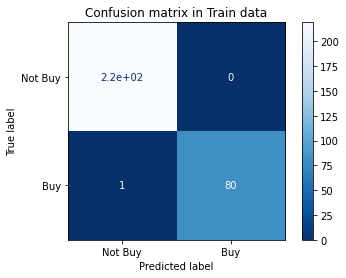

In [109]:
cm_train = confusion_matrix(y_train, y_pred_train)
print('Accuracy score in Train data: ', model.score(X_train, y_train))
print('Confusion matrix in Train data: \n', cm_train)
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues_r', display_labels = ('Not Buy', 'Buy'))
plt.title('Confusion matrix in Train data')

Accuracy score in Test data:  0.67
Confusion matrix in Test data: 
 [[38  0]
 [33 29]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

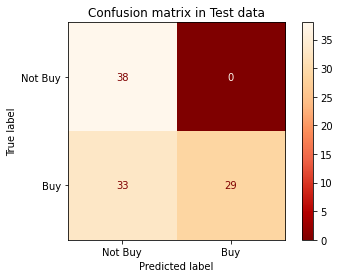

In [110]:
cm_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score in Test data: ', model.score(X_test, y_test))
print('Confusion matrix in Test data: \n', cm_test)
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd_r', display_labels = ('Not Buy', 'Buy'))
plt.title('Confusion matrix in Test data')

# 7 . Visualize Decision Tree

In [0]:
from sklearn import tree

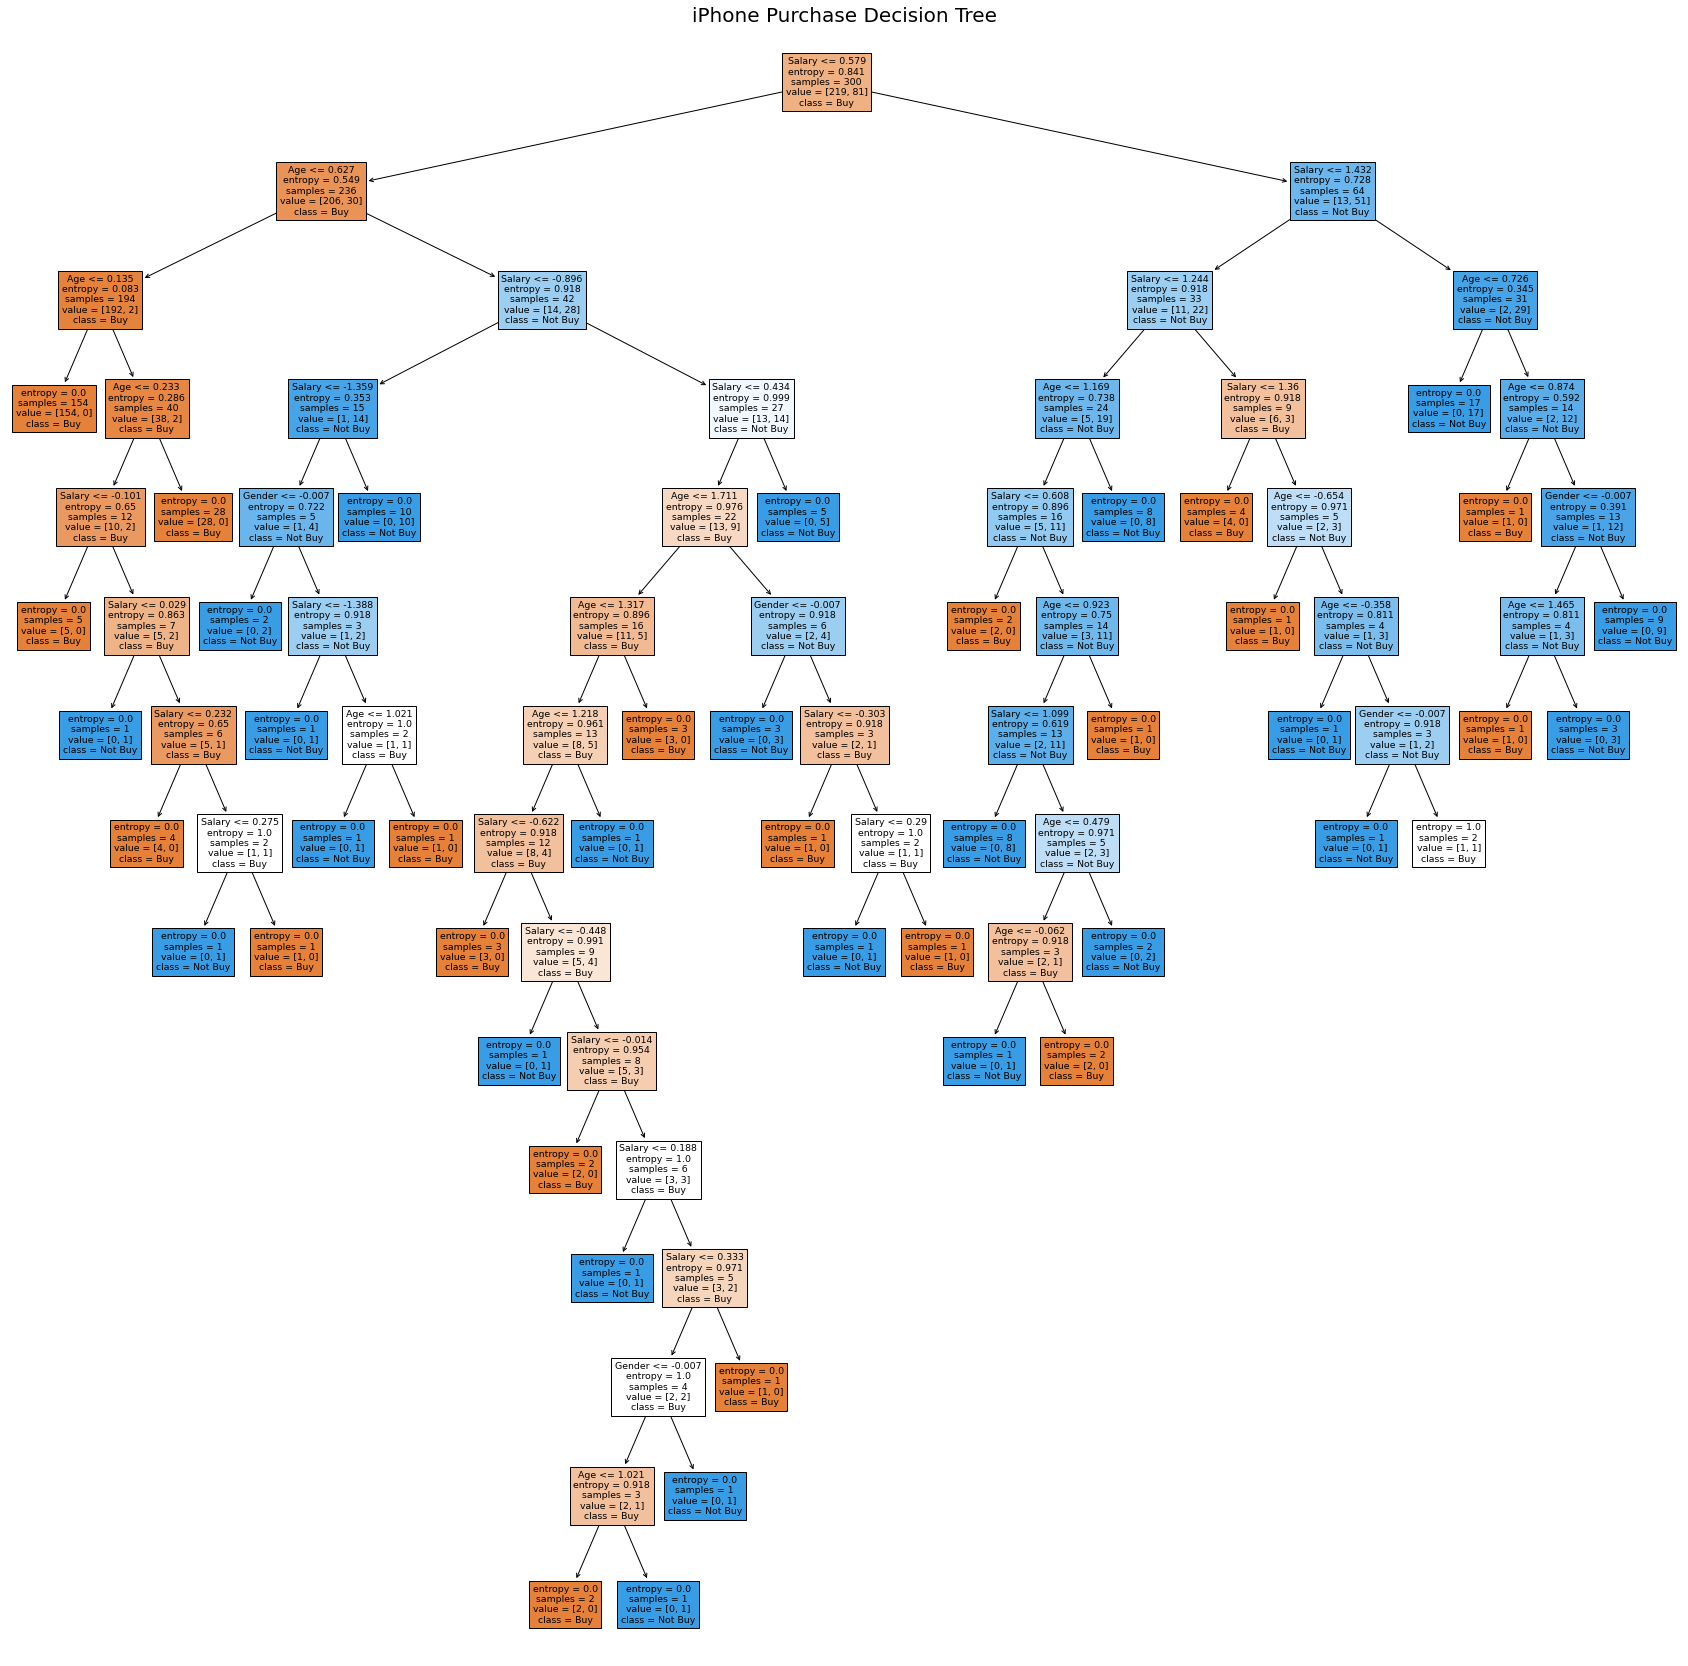

In [112]:
plt.figure(figsize = (30, 30))
tree.plot_tree(model, feature_names = X.columns, class_names = ('Buy', 'Not Buy'), filled = True)
plt.title('iPhone Purchase Decision Tree', fontsize = 20)
plt.savefig('tree_iphone.png')